In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [203]:
df = pd.read_csv("./data/datasetFpmIcuStayDetail.csv")
df = df.drop_duplicates(subset="icustay_id")

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19002 entries, 0 to 108361
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   icustay_id              19002 non-null  int64  
 1   age                     19002 non-null  float64
 2   pulmonary               19002 non-null  int64  
 3   pao2fio2                9841 non-null   float64
 4   mingcs                  18993 non-null  float64
 5   heartrate_mean          19001 non-null  float64
 6   wbc_min                 18918 non-null  float64
 7   wbc_max                 18918 non-null  float64
 8   sysbp_mean              18983 non-null  float64
 9   urineoutput             18981 non-null  float64
 10  pco2                    19001 non-null  float64
 11  po2                     19002 non-null  int64  
 12  icu_level               19002 non-null  int64  
 13  subject_id              19002 non-null  int64  
 14  hadm_id                 19002 non-nul

In [205]:
df.pop("icustay_id")
df.pop("subject_id")
df.pop("hadm_id")

df2 = df[[column for column in df if df[column].count() / len(df) >= 0.5]]
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: dod, 



In [206]:
df = df[(df['age'] > 18) & (df['age'] < 89)]

count    19002.000000
mean         1.376487
std          0.614827
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: icu_level, dtype: float64


<AxesSubplot:xlabel='icu_level', ylabel='Count'>

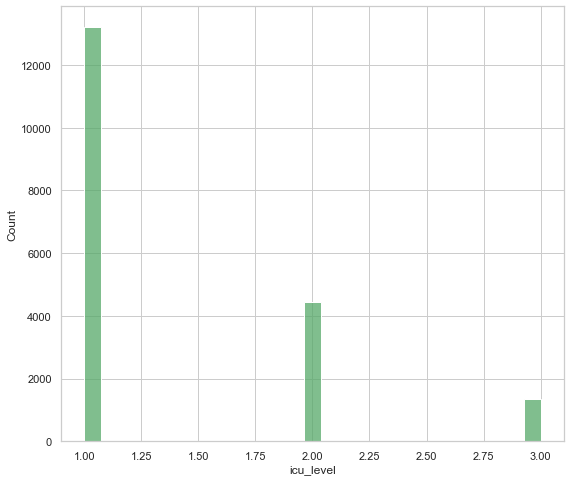

In [207]:
print(df['icu_level'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(df['icu_level'], color='g')

In [208]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [209]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,age,pulmonary,pao2fio2,mingcs,heartrate_mean,wbc_min,wbc_max,sysbp_mean,urineoutput,pco2,po2,icu_level,los_hospital,hospital_expire_flag,hospstay_seq,los_icu,icustay_seq,elixhauser_vanwalraven,elixhauser_sid29,elixhauser_sid30
0,50.645076,3,NaN,15.0,114.774194,32.1,36.1,138.966667,5.0,26.0,68,3,19.9583,0,1,11.9928,1,12.0,18.0,20.0
1,60.761024,0,NaN,15.0,92.071429,7.4,7.4,100.489362,1500.0,50.0,308,1,6.2208,0,1,4.0042,1,0.0,-1.0,6.0
2,64.889926,0,NaN,15.0,89.371429,10.0,10.0,103.228571,1766.0,41.0,396,1,6.1938,0,1,2.2125,1,0.0,-2.0,-2.0
3,56.996581,0,NaN,14.0,88.189189,9.5,18.8,154.365854,2135.0,36.0,118,1,7.4639,0,1,2.0794,1,7.0,8.0,17.0
4,64.887600,3,128.571429,15.0,89.310345,7.3,13.3,143.606061,2700.0,41.0,90,1,29.9424,0,1,21.9733,1,0.0,0.0,0.0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'pulmonary'}>,
        <AxesSubplot:title={'center':'pao2fio2'}>,
        <AxesSubplot:title={'center':'mingcs'}>],
       [<AxesSubplot:title={'center':'heartrate_mean'}>,
        <AxesSubplot:title={'center':'wbc_min'}>,
        <AxesSubplot:title={'center':'wbc_max'}>,
        <AxesSubplot:title={'center':'sysbp_mean'}>],
       [<AxesSubplot:title={'center':'urineoutput'}>,
        <AxesSubplot:title={'center':'pco2'}>,
        <AxesSubplot:title={'center':'po2'}>,
        <AxesSubplot:title={'center':'icu_level'}>],
       [<AxesSubplot:title={'center':'los_hospital'}>,
        <AxesSubplot:title={'center':'hospital_expire_flag'}>,
        <AxesSubplot:title={'center':'hospstay_seq'}>,
        <AxesSubplot:title={'center':'los_icu'}>],
       [<AxesSubplot:title={'center':'icustay_seq'}>,
        <AxesSubplot:title={'center':'elixhauser_vanwalraven'}>,
        <AxesSubplot:title={'center':'elixhause

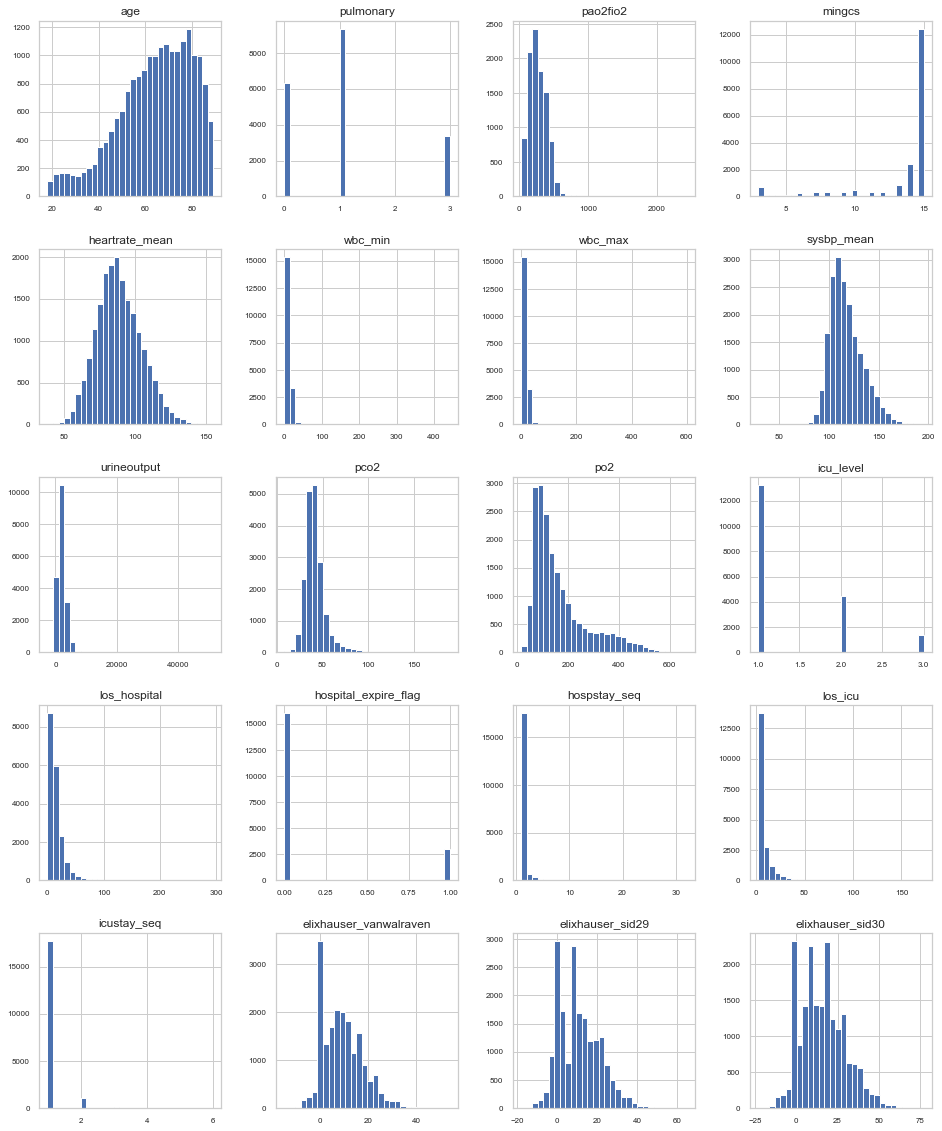

In [210]:
df_num.hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8)

In [211]:
df_num_corr = df_num.corr()['icu_level']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.3].sort_values(ascending=False)
print("There is {} strongly correlated values with icu_level:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with icu_level:
icu_level    1.000000
pulmonary    0.325109
mingcs      -0.462581
Name: icu_level, dtype: float64


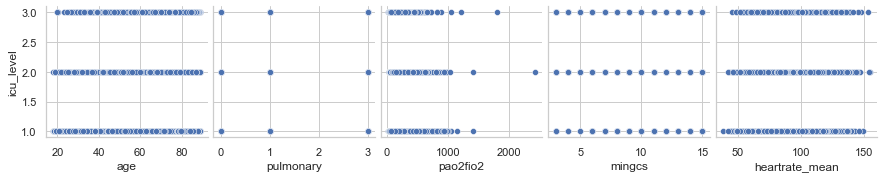

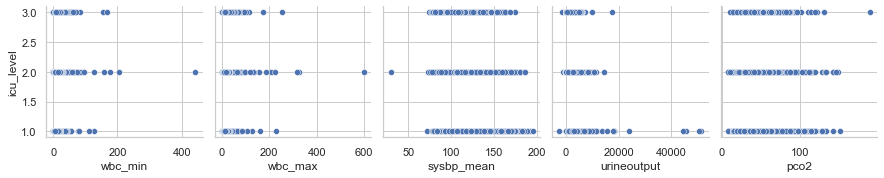

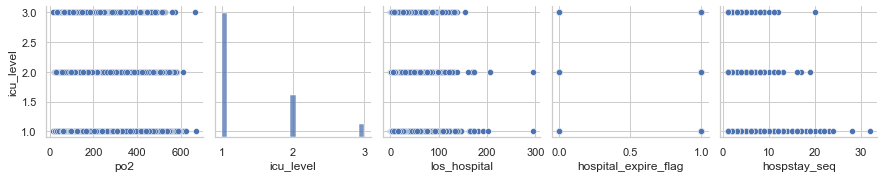

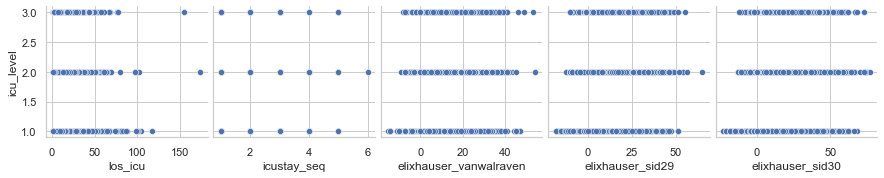

In [212]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['icu_level'])

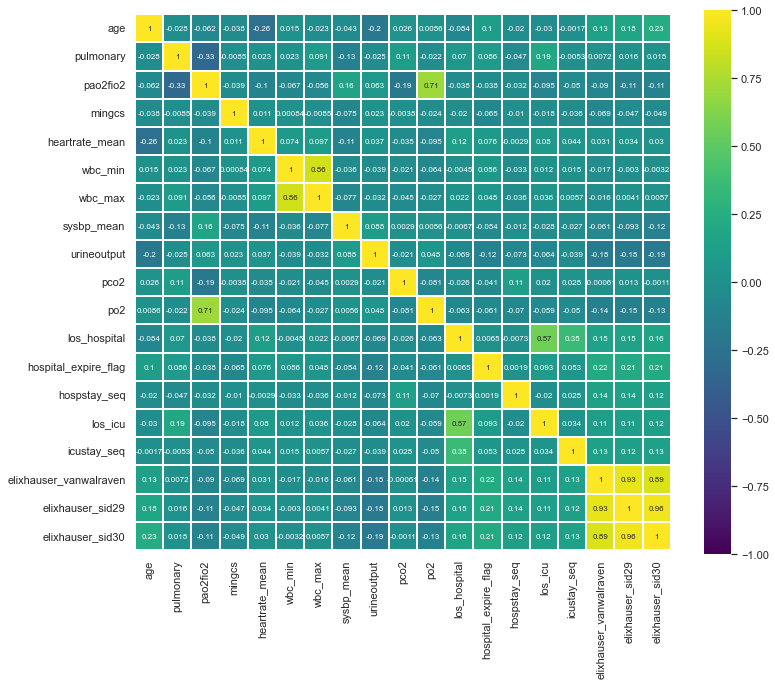

In [213]:
corr = df_num.drop('icu_level', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);